# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [56]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [57]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(code, ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [58]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [59]:
pattern_code = re.compile(r'^(.+)([0-9A]{4}).+$')

ods_name = 'mkt_capital_top_30.ods'
df_ods = pd.read_excel(ods_name)
list_code = list()
for name in df_ods['銘柄名']:
    m = pattern_code.match(name)
    if m:
        print(m.group(1))
        code = m.group(2)
        list_code.append(code)
    else:
        print('ERROR!', name)
print(list_code)

トヨタ
ソニーＧ
三菱ＵＦＪ
日立
ファストリ
中外薬
キーエンス
ＮＴＴ
任天堂
三井住友ＦＧ
ＫＤＤＩ
リクルート
伊藤忠
ＳＢ
東京海上
三菱商
ＳＢＧ
東エレク
三菱重
みずほＦＧ
ＪＴ
三井物
信越化
ホンダ
武田
第一三共
富士通
ＯＬＣ
キヤノン
ＨＯＹＡ
['7203', '6758', '8306', '6501', '9983', '4519', '6861', '9432', '7974', '8316', '9433', '6098', '8001', '9434', '8766', '8058', '9984', '8035', '7011', '8411', '2914', '8031', '4063', '7267', '4502', '4568', '6702', '4661', '7751', '7741']


In [60]:
dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [61]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    if len(df) == 0:
        print('### no data in', symbol)
        continue
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

,7203,6758,8306,6501,9983,4519,6861,9432,7974,8316,...,2914,8031,4063,7267,4502,4568,6702,4661,7751,7741
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.983236,0.988840,0.984000,0.969175,0.992379,...,0.972455,0.970608,0.980535,1.031250,0.994306,0.994916,0.986138,0.998713,0.984179,0.988415
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.999574,0.988193,0.983333,0.975975,0.980088,...,0.990419,0.975727,0.984738,1.032280,0.995401,0.994113,0.964055,1.002575,0.994658,1.003673
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,1.007387,0.993692,0.992000,1.027199,0.985988,...,0.993772,0.987450,0.990047,1.025412,0.992992,0.996521,0.964055,0.996138,0.996507,1.006782
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.983672,0.985554,0.983656,1.000426,0.973799,0.994573,0.982321,0.982036,...,1.005749,0.988415,0.986347,0.973980,0.999776,0.989749,1.011334,0.984516,0.989727,0.991806
2025-03-31,0.941515,0.977414,0.938185,0.925094,0.947527,0.965904,0.945819,0.981683,0.916591,0.946856,...,0.985389,0.940060,0.948075,0.944093,0.987690,0.947127,0.955635,0.950000,0.954387,0.948290
2025-04-01,0.946734,0.977414,0.930254,0.919743,0.955699,0.964342,0.936115,0.980326,0.925204,0.934132,...,0.995928,0.948623,0.947851,0.945851,1.009176,1.004316,0.960492,0.943226,0.965276,0.931619
2025-04-02,0.955911,0.957944,0.916025,0.927501,0.991398,0.935502,0.935145,0.968114,0.944696,0.918413,...,0.986826,0.936199,0.945837,0.957103,0.997762,0.966280,0.957416,0.924677,0.964660,0.930206
2025-04-03,0.906424,0.911734,0.850478,0.867576,0.974194,0.941611,0.898916,0.966757,0.913871,0.847804,...,0.969581,0.914876,0.921218,0.934951,1.016115,0.979768,0.929080,0.919355,0.916992,0.887821
2025-04-04,0.866475,0.868380,0.778400,0.817014,0.965591,0.945305,0.884522,0.977612,0.904533,0.779691,...,0.973892,0.890698,0.871531,0.883966,1.002014,0.976531,0.909812,0.941290,0.880214,0.883865


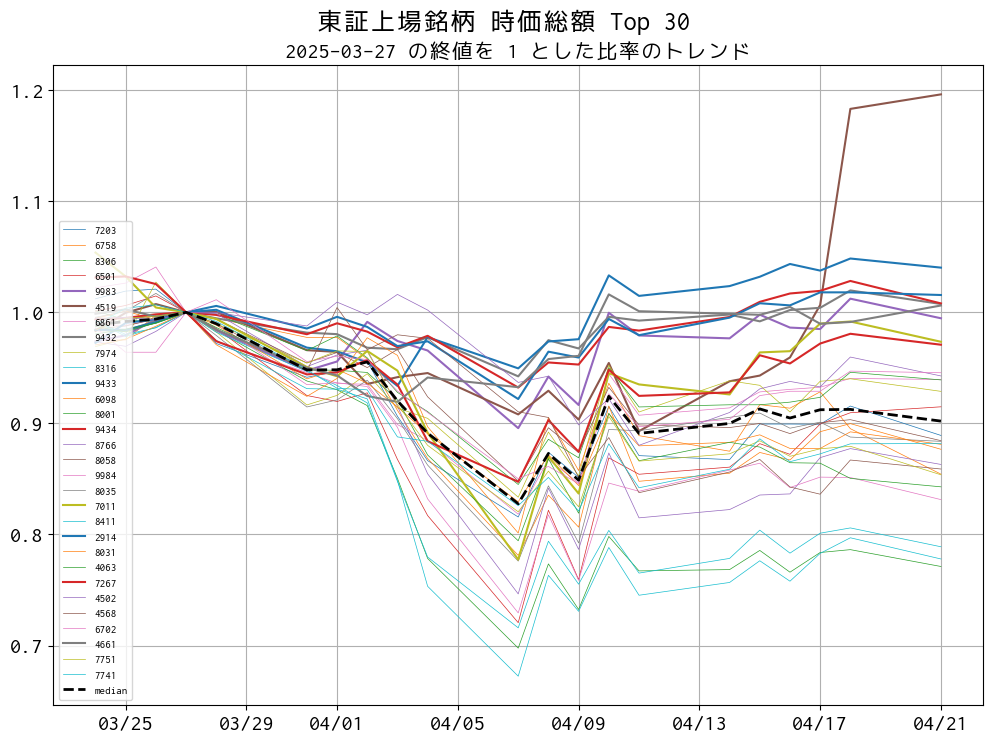

In [62]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    match colname:
        case '4519':
            width = 1.5
            lstyle = 'solid'
        case '7011':
            width = 1.5
            lstyle = 'solid'
        case '7267':
            width = 1.5
            lstyle = 'solid'
        case '9983':
            width = 1.5
            lstyle = 'solid'
        case '4661':
            width = 1.5
            lstyle = 'solid'
        case '2914':
            width = 1.5
            lstyle = 'solid'
        case '9432':
            width = 1.5
            lstyle = 'solid'
        case '9433':
            width = 1.5
            lstyle = 'solid'
        case '9434':
            width = 1.5
            lstyle = 'solid'
        case _:
            width = 0.5
            lstyle = 'solid'

    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.plot(summary.median(axis=1), lw=2, color='black', ls='dashed', label='median')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の終値を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='lower left', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()

In [63]:
summary

,7203,6758,8306,6501,9983,4519,6861,9432,7974,8316,...,2914,8031,4063,7267,4502,4568,6702,4661,7751,7741
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.983236,0.988840,0.984000,0.969175,0.992379,...,0.972455,0.970608,0.980535,1.031250,0.994306,0.994916,0.986138,0.998713,0.984179,0.988415
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.999574,0.988193,0.983333,0.975975,0.980088,...,0.990419,0.975727,0.984738,1.032280,0.995401,0.994113,0.964055,1.002575,0.994658,1.003673
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,1.007387,0.993692,0.992000,1.027199,0.985988,...,0.993772,0.987450,0.990047,1.025412,0.992992,0.996521,0.964055,0.996138,0.996507,1.006782
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.983672,0.985554,0.983656,1.000426,0.973799,0.994573,0.982321,0.982036,...,1.005749,0.988415,0.986347,0.973980,0.999776,0.989749,1.011334,0.984516,0.989727,0.991806
2025-03-31,0.941515,0.977414,0.938185,0.925094,0.947527,0.965904,0.945819,0.981683,0.916591,0.946856,...,0.985389,0.940060,0.948075,0.944093,0.987690,0.947127,0.955635,0.950000,0.954387,0.948290
2025-04-01,0.946734,0.977414,0.930254,0.919743,0.955699,0.964342,0.936115,0.980326,0.925204,0.934132,...,0.995928,0.948623,0.947851,0.945851,1.009176,1.004316,0.960492,0.943226,0.965276,0.931619
2025-04-02,0.955911,0.957944,0.916025,0.927501,0.991398,0.935502,0.935145,0.968114,0.944696,0.918413,...,0.986826,0.936199,0.945837,0.957103,0.997762,0.966280,0.957416,0.924677,0.964660,0.930206
2025-04-03,0.906424,0.911734,0.850478,0.867576,0.974194,0.941611,0.898916,0.966757,0.913871,0.847804,...,0.969581,0.914876,0.921218,0.934951,1.016115,0.979768,0.929080,0.919355,0.916992,0.887821
2025-04-04,0.866475,0.868380,0.778400,0.817014,0.965591,0.945305,0.884522,0.977612,0.904533,0.779691,...,0.973892,0.890698,0.871531,0.883966,1.002014,0.976531,0.909812,0.941290,0.880214,0.883865


In [64]:
df_ranking = summary.tail(1).iloc[0].sort_values(ascending=False)
df_ranking

4519    1.196193
9433    1.040213
2914    1.015569
9434    1.007996
9432    1.007463
4661    1.006129
9983    0.994624
7011    0.973466
7267    0.970816
6702    0.945596
4502    0.942704
6861    0.939512
8001    0.939135
7974    0.928830
6501    0.914928
7203    0.889149
8058    0.884448
8035    0.883825
7741    0.881888
8031    0.881128
6758    0.876687
8766    0.863041
4568    0.858916
6098    0.854297
7751    0.853709
4063    0.842883
9984    0.831375
8316    0.788922
8411    0.777931
8306    0.771169
Name: 2025-04-21 00:00:00, dtype: float64

In [65]:
#for code in ['4519', '9433', '2914', '9434', '9432', '4661', '9983', '7011', '7267']:
for code in df_ranking.index[0:9]:
    get_code_into(code)
    print()

print('Median')
print(summary.median(axis=1).tail(3))

4519 Chugai Pharmaceutical Co., Ltd.
2025-04-17    1.006535
2025-04-18    1.183123
2025-04-21    1.196193
Name: Close, dtype: float64

9433 KDDI Corporation
2025-04-17    1.037546
2025-04-18    1.048420
2025-04-21    1.040213
Name: Close, dtype: float64

2914 Japan Tobacco Inc.
2025-04-17    1.017964
2025-04-18    1.017964
2025-04-21    1.015569
Name: Close, dtype: float64

9434 SoftBank Corp.
2025-04-17    1.019285
2025-04-18    1.028222
2025-04-21    1.007996
Name: Close, dtype: float64

9432 Nippon Telegraph and Telephone Corporation
2025-04-17    1.004071
2025-04-18    1.019674
2025-04-21    1.007463
Name: Close, dtype: float64

4661 Oriental Land Co., Ltd.
2025-04-17    0.989677
2025-04-18    0.991290
2025-04-21    1.006129
Name: Close, dtype: float64

9983 Fast Retailing Co., Ltd.
2025-04-17    0.984946
2025-04-18    1.012258
2025-04-21    0.994624
Name: Close, dtype: float64

7011 Mitsubishi Heavy Industries, Ltd.
2025-04-17    0.989838
2025-04-18    0.991720
2025-04-21    0.973

In [66]:
summary.median(axis=1)

2025-03-24    0.988628
2025-03-25    0.991767
2025-03-26    0.993942
2025-03-27    1.000000
2025-03-28    0.989738
2025-03-31    0.948183
2025-04-01    0.948237
2025-04-02    0.955387
2025-04-03    0.920286
2025-04-04    0.891153
2025-04-07    0.827678
2025-04-08    0.872879
2025-04-09    0.848856
2025-04-10    0.924382
2025-04-11    0.890984
2025-04-14    0.899958
2025-04-15    0.913023
2025-04-16    0.904825
2025-04-17    0.912287
2025-04-18    0.912590
2025-04-21    0.902038
dtype: float64